Week 4 AML 2025 [Lab]
Additional Notes:
KNeighborsClassifier : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Effective k‑nearest neighbor models for data classification enhancement: https://journalofbigdata.springeropen.com/articles/10.1186/s40537-025-01137-2#citeas

Enhancing K-Nearest Neighbor algorithm: https://journalofbigdata.springeropen.com/articles/10.1186/s40537-024-00973-y

What is the k-nearest neighbhors algorithm? : https://www.ibm.com/think/topics/knn#:~:text=Hamming%20distance%20example-,Compute%20KNN%3A%20defining%20k,as%20its%20single%20nearest%20neighbor.

In [5]:
!pip install scikit-learn

In [7]:
!pip install seaborn==0.12.2

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target

In [10]:
# Check the structure and summary of the dataset
print(df.head())  # Display the first few rows of the dataset
print(df.describe())  # Summary statistics
print(df.info())  # Information about data types and missing values

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.35

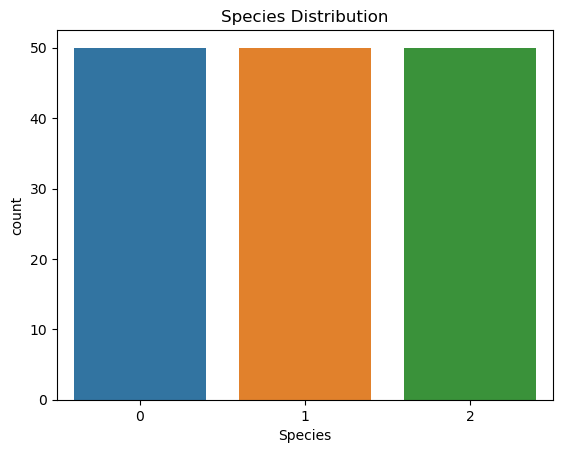

In [11]:
# Data visualization
# Species distribution
sns.countplot(x='Species', data=df)
plt.title("Species Distribution")
plt.show()

C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


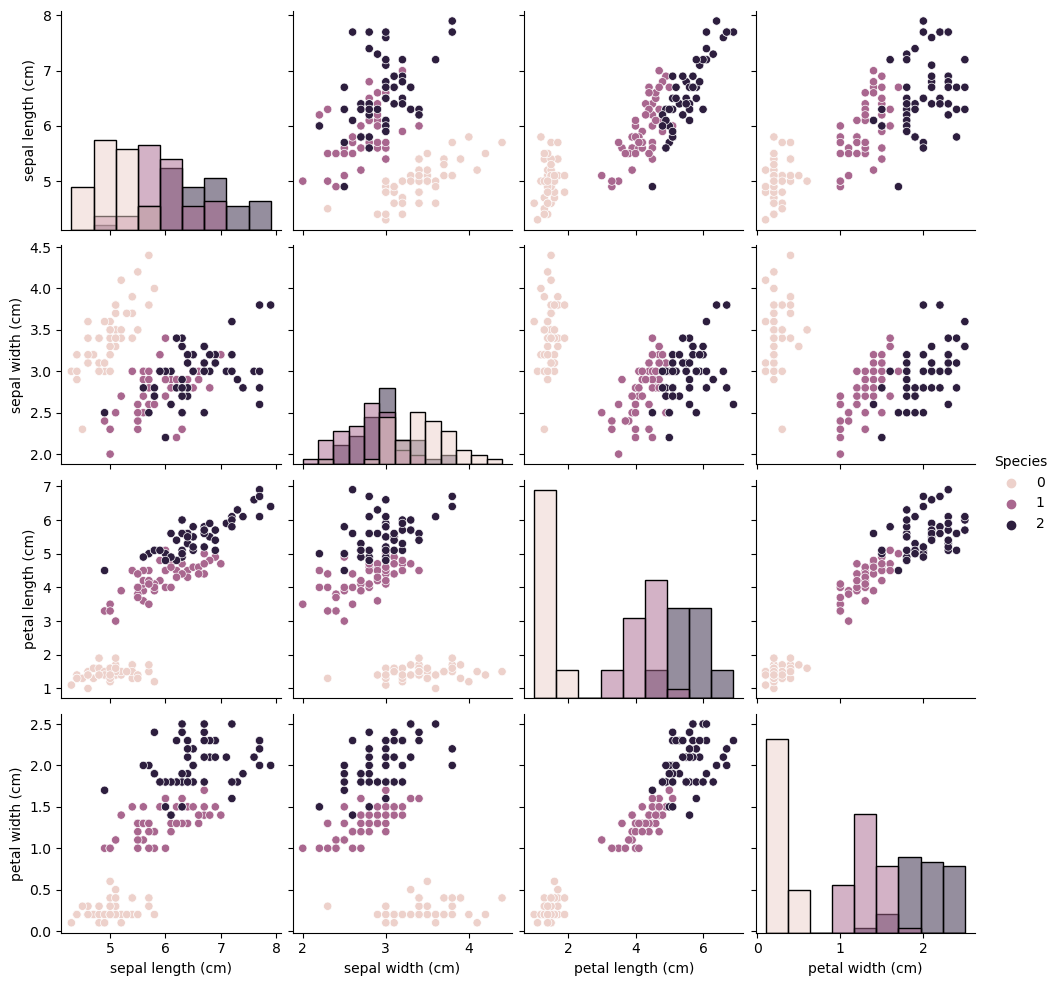

In [12]:
# Pair plot for numerical data
sns.pairplot(df, hue="Species", diag_kind="hist")
plt.show()

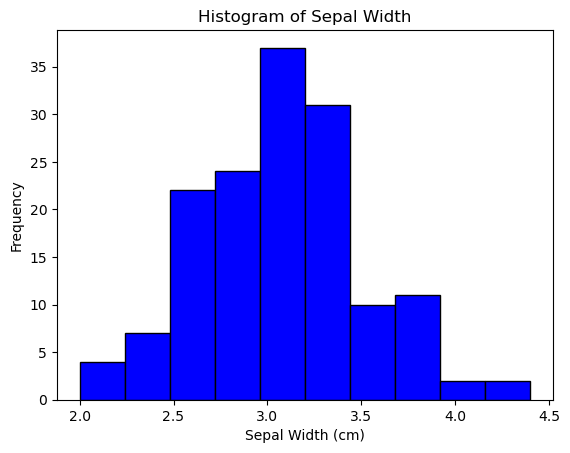

In [13]:
# Histogram for a specific feature
plt.hist(df['sepal width (cm)'], bins=10, color='blue', edgecolor='black')
plt.title("Histogram of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()

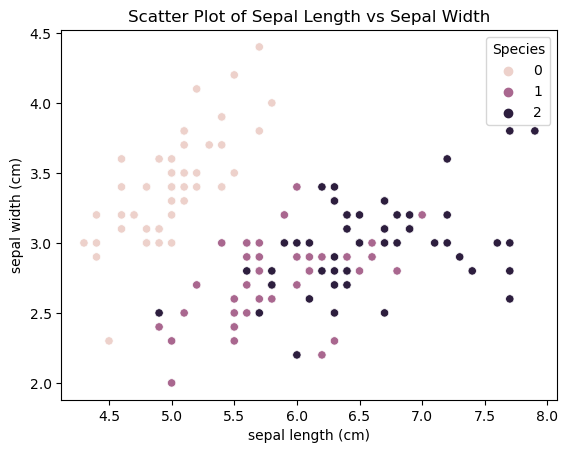

In [14]:
# Scatter plot for two features
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='Species', data=df)
plt.title("Scatter Plot of Sepal Length vs Sepal Width")
plt.show()

In [16]:
# Preprocessing: Normalize the data
features = df.iloc[:, :-1]  # Select only the feature columns
target = df.iloc[:, -1]  # Select the target column
scaler = MinMaxScaler()
normalized_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
 
print(normalized_features.head())  # Check normalized features

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


In [17]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size=0.2, random_state=9850)

In [18]:
# Building the KNN model
k = 13  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)  # Train the model

KNeighborsClassifier(n_neighbors=13)

In [19]:
# Predictions
y_pred = knn.predict(X_test)

In [20]:
# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0 12  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

